# 线性回归

- 解决回归问题
- 思想简单，实现容易
- 许多强大的非线性模型的基础
- 结果具有很好的可解释性
- 蕴含机器学习中的很多重要思想


线性回归是利用数理统计中回归分析，来确定两种或两种以上变量间相互依赖的定量关系的一种统计分析方

样本特征只有一个的称为简单线性回归

假设我们找到了最佳拟合的直线方程 `y = ax + b`, 则对于每一个样本点 $x^{(i)}$, 根据直线方程，预测值为$\hat y^{(i)} = ax^{(i)} + b$, 真实值为：$y^{(i)}$

表达 $y^{(i)}$ 和 $\hat y^{(i)}$ 的差距：$ (y^{(i)} - \hat y^{(i)})^2 $

对于所有的样本得
$$\sum_{i=1}^m(y^{(i)} - \hat y^{(i)})^2$$
带入$\hat y^{(i)} = ax^{(i)} + b$，可得
$$\sum_{i=1}^m(y^{(i)} - ax^{(i)} - b)^2$$

目标转换为找到 a 和 b 使得上式(损失函数)尽可能的小

一类机器学习算法的基本思路：
通过分析问题，确定问题的损失函数或者效用函数;
通过最优化损失函数或者效用函数，获得机器学习的模型；
这类机器学习算法包括 线性回归、多项式回归、逻辑回归、SVM、神经网络等

## 最小二乘法问题

最小化误差的平方

假设$J(a, b) = \sum_{i=1}^m(y^{(i)} - ax^{(i)} - b)^2$, 要获得该函数的极值，即对该函数的各个未知分量求导，使其导数为0。即：

$\frac {\partial J(a, b)}{\partial a} = 0$，
$\frac {\partial J(a, b)}{\partial b} = 0$

$
\begin{align}
\frac {\partial J(a, b)}{\partial b} = 
 & \sum_{i=1}^m2(y^{(i)} - ax^{(i)} - b)(-1) = 0 \\
 & \sum_{i=1}^m(y^{(i)} - ax^{(i)} - b) = 0 \\
 & \sum_{i=1}^my^{(i)} - a\sum_{i=1}^mx^{(i)} - \sum_{i=1}^mb = 0\\
 & \sum_{i=1}^my^{(i)} - a\sum_{i=1}^mx^{(i)} - mb = 0\\ 
 & \sum_{i=1}^my^{(i)} - a\sum_{i=1}^mx^{(i)} = mb \Rightarrow b = \bar y - a\bar x (\bar x和\bar y分别为x和y的均值)\\
\end{align}
$

$
\begin{align}
\frac {\partial J(a, b)}{\partial a} = 
 & \sum_{i=1}^m2(y^{(i)} - ax^{(i)} - b)(-x^{(i)}) = 0 \\
 & \sum_{i=1}^m(y^{(i)} - ax^{(i)} - b)x^{(i)} = 0 \\
 & \sum_{i=1}^m(y^{(i)} - ax^{(i)} - \bar y + a\bar x)x^{(i)} = 0\\
 & \sum_{i=1}^m(x^{(i)}y^{(i)} - a(x^{(i)})^2 - x^{(i)}\bar y + a\bar xx^{(i)}) = 0\\
 & \sum_{i=1}^m(x^{(i)}y^{(i)} - x^{(i)}\bar y  - a(x^{(i)})^2 + a\bar xx^{(i)}) = 0\\
 & \sum_{i=1}^m(x^{(i)}y^{(i)} - x^{(i)}\bar y) - \sum_{i=1}^m(a(x^{(i)})^2 - a\bar xx^{(i)}) = 0\\
 & \sum_{i=1}^m(x^{(i)}y^{(i)} - x^{(i)}\bar y) - a\sum_{i=1}^m((x^{(i)})^2 - \bar xx^{(i)}) = 0\\
 & a = \frac{\sum_{i=1}^m(x^{(i)}y^{(i)} - x^{(i)}\bar y)}{\sum_{i=1}^m((x^{(i)})^2 - \bar xx^{(i)})}
\end{align}
$

对于公式$\sum_{i=1}^mx^{(i)}\bar y$ 可以进一步推导

$
\begin{align}
\sum_{i=1}^mx^{(i)}\bar y
 & = \bar y\sum_{i=1}^mx^{(i)} \\
 & = m\bar y\bar x = \sum_{i=1}^m\bar x\bar y\\
 & = \bar x \sum_{i=1}^my^{(i)}\\
 & = \sum_{i=1}^m\bar xy^{(i)} \\
\end{align}
$

带入a中可得到

$
\begin{align}
a = \frac{\sum_{i=1}^m(x^{(i)}y^{(i)} - x^{(i)}\bar y)- \bar xy^{(i)} + \bar x \bar y)}{\sum_{i=1}^m((x^{(i)})^2 - \bar xx^{(i)} - \bar xx^{(i)} + \bar x^2)}
 & = \frac{\sum_{i=1}^m(x^{(i)} - \bar x)(y^{(i)} - \bar y)}{\sum_{i=1}^m(x^{(i)} - \bar x)^2} 
\end{align}
$

总结: 通过上面的推导可以得到a和b的值
$$a = \frac{\sum_{i=1}^m(x^{(i)} - \bar x)(y^{(i)} - \bar y)}{\sum_{i=1}^m(x^{(i)} - \bar x)^2}, b = \bar y - a\bar x $$

## 实现简单线性回归算法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.array([1., 2., 3., 4., 5.])
y_train = np.array([1., 3., 2., 3., 5.])

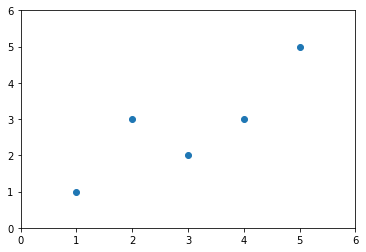

In [3]:
plt.scatter(x_train, y_train)
plt.axis([0, 6, 0, 6])
plt.show()

In [4]:
x_mean = np.mean(x_train)
y_mean = np.mean(y_train)

In [5]:
# 求a的值
num = 0.0 # 分母
d = 0.0 # 分子
for x_i, y_i in zip(x_train, y_train):
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i - x_mean) ** 2

In [6]:
a = num / d
b = y_mean - a * x_mean

In [7]:
a

0.80000000000000004

In [8]:
b

0.39999999999999947

In [10]:
# 使用求出的a和b的值，预测x_train
y_hat = a * x_train + b

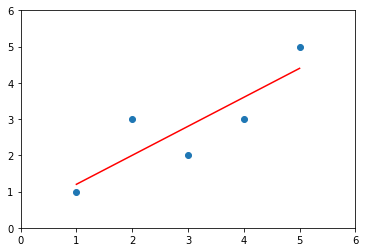

In [11]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_hat, color='r')
plt.axis([0, 6, 0, 6])
plt.show()

In [12]:
x_predict = 6
y_predict = a * x_predict + b
y_predict

5.2000000000000002

## 向量化实现简单线性回归

上述中求a的值时，对于分子和分母使用了for循环操作，效率低下。仔细观察后，可以将a的表达式转换为向量操作

这里简单介绍下两个向量之间的点乘：

向量的点乘,也叫向量的内积、数量积，对两个向量执行点乘运算，就是对这两个向量对应位一一相乘之后求和的操作，点乘的结果是一个标量

假设存在向量$\vec a = [a_1, a_2,...a_n]$, 存在向量$\vec b = [b_1, b_2,...b+n]$,则
$$
\vec a\cdot \vec b = a_1b_1 + a_2b_2+...+a_nb_n
$$

则对于
$$a = \frac{\sum_{i=1}^m(x^{(i)} - \bar x)(y^{(i)} - \bar y)}{\sum_{i=1}^m(x^{(i)} - \bar x)^2}$$

可以用下面的代码求解其值

In [15]:
num = (x_train - x_mean).dot(y_train - y_mean)
d = (x_train - x_mean).dot(x_train - x_mean)
a = num / d
a

0.80000000000000004

#### 测试向量化的性能

In [17]:
m = 1000000
big_x = np.random.random(size=m)
big_y = big_x * 2.0 + 3.0 + np.random.normal(size=m)

In [34]:
x_mean = np.mean(big_x)
y_mean = np.mean(big_y)

In [52]:
%%time
num = 0.0
d = 0.0
for x_i, y_i in zip(big_x, big_y):
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i - x_mean) ** 2
print(num)
print(d)

167019.255941
83386.6447275
CPU times: user 1.04 s, sys: 7 ms, total: 1.04 s
Wall time: 1.06 s


In [51]:
%%time
num = (big_x - x_mean).dot(big_y - y_mean)
d = (big_x - x_mean).dot(big_x - x_mean)
print(num)
print(d)

167019.255941
83386.6447275
CPU times: user 11.4 ms, sys: 7.52 ms, total: 18.9 ms
Wall time: 17.1 ms


In [48]:
a = num / d
b = y_mean - a * x_mean
print(a)
print(b)

2.00294971079
2.99821712073
